In [2]:
from pytheus import help_functions as hf, theseus as th, fancy_classes as fc, graphplot as gp
from neuralnet import load_model
from datagen import generatorGraphFidelity
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import glob


# Load up all csvs in the relevant directory

directory = "dreamfiles/dream_looong_layer20"
neuron_indices = [0]
fileLists = []
data = []
for neuron in neuron_indices:
    fileLists.append(glob.glob(f"{directory}/*_{neuron}.csv"))
    
fileLists = fileLists[0]
# Now load up all the csv files

for filename in fileLists:
    df = pd.read_csv(filename, sep=";", names=['fidelity', 'activation', 'graph'])
    data.append([list(df.iloc[:, 0]), list(df.iloc[:, 1]), list(df.iloc[:,2])])
    
    
# Some preliminaries 

DIM = [2] * 4
kets = hf.makeState('0000+1111')
state = fc.State(kets, normalize=True)
edges = th.buildAllEdges(DIM)
graph = fc.Graph(edges)



# Let us consider different colours 
colour = cm.rainbow(np.linspace(0,1,1000))

In [14]:
# Load up initial and final dataset.

init = []
final = []

for ii, sample in enumerate(data):
    init.append(sample[0][0])
    final.append(sample[0][-1])
    
maxFid = np.argmax(final)

Saves sets of graphs

In [7]:
# Loads the initial graphs and saves them as .csv files
from datagen import constructGraph 
from pytheus.lossfunctions import fidelity
import csv


cnfgfid = {"heralding_out": False, "imaginary": False}
fid = fidelity(graph,state,cnfgfid)

fileLists = fileLists[:20]

def saveInit(fileList):
    weightList = []
    for ii, filename in enumerate(fileList):
        df = pd.read_csv(filename, sep=";", names=['fidelity', 'activation', 'graph'])
        initWeights = eval(df.iloc[0, 2])
        initWeights = [w / np.max(np.abs(initWeights)) for w in initWeights] # renormalization step
        output_fidelity = constructGraph(initWeights, [2]*4, fid, 'a')[0]
        with open(f'init_{len(fileList)}.csv', 'a') as f:
                writer = csv.writer(f, delimiter=";")
                writer.writerow([list(initWeights), output_fidelity])
        
        
saveInit(fileLists)

# Figure 2: Plotting Fidelity-Loss Evolution

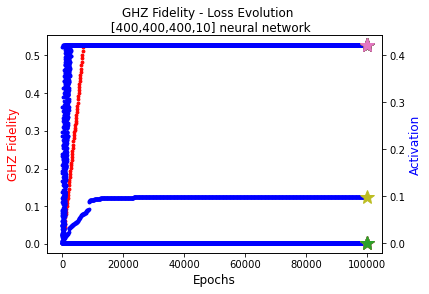

In [21]:
# We can obtain the total number of epochs from the datalength. 
# We save data every 100 epochs in the procedure, so we therefoe have e.g.
# 100 * len(data[0][0]) epochs

epochs = np.arange(0,len(data[0][0])*100,100)

# create figure and axis objects with subplots()
fig,ax = plt.subplots()

fig.suptitle("GHZ Fidelity - Loss Evolution \n [400,400,400,10] neural network")

# make a plot
ax.scatter(epochs,fancySample[0], color='r', s = 8)
ax.plot(epochs[-1],[fancySample[0][-1]], marker='*', markersize=14)

# set x-axis label
ax.set_xlabel("Epochs", fontsize = 12)
# set y-axis label
ax.set_ylabel("GHZ Fidelity",
              color="red",
              fontsize=12)

ax2=ax.twinx()
# set x-axis label
ax2.set_xlabel("Epochs", fontsize = 12)
# set y-axis label
ax2.set_ylabel("Activation",
              color="Blue",
              fontsize=12)

# make a plot


for sample in data:
    ax2.scatter(epochs,sample[1], color='b', s=8)
    ax2.plot(epochs[-1],[sample[1][-1]], marker='*', markersize=14)

In [ ]:
# Now we apply renormalization on our chosen graph and make a fancy graph plot of the smegger

graphWeights = []

for weights in fancySample[2]:
    temp = eval(weights)
    temp = [w / np.max(np.abs(temp)) for w in temp] # renormalization step
    graphWeights.append(temp)


def plotGraph(graphWeight, edges, epoch, threshold):
    graph = fc.Graph(edges=edges, weights=graphWeight[epoch])
    graph.purge(threshold=threshold, update=True)
    newgraph = fc.Graph(graph.edges, weights=graph.weights)
    gp.graphPlot(newgraph)
    #gp.leiwandPlot(newgraph, name=f"graph_{epoch}")

plotGraph(graphWeights, edges, 200 ,0.4)

In [ ]:
%hist -g 

# Figure 3: Histogram Plot

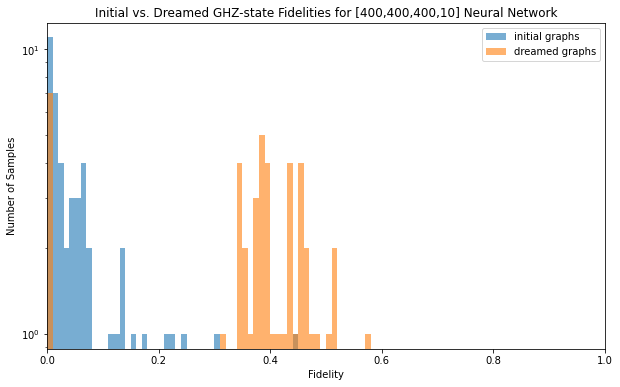

In [22]:
# Make the histogram plot
plt.figure(figsize=(10, 6))
bins = np.arange(0, 1, 0.01)
plt.title('Initial vs. Dreamed GHZ-state Fidelities for [400,400,400,10] Neural Network')
plt.yscale('log')
plt.xlim([0,1])
plt.hist(init, bins=bins, alpha=0.6, orientation="vertical",label='initial graphs')
plt.hist(final, bins=bins, alpha=0.6, orientation="vertical",label='dreamed graphs')
plt.xlabel('Fidelity')
plt.ylabel('Number of Samples')
plt.legend(prop={'size': 10})


# Figure 4: Crazy Graph Plot

In [92]:
import yaml 
from yaml import Loader

# Let's load up data from dreaming on the inverse layer

directory = "dreamfiles/dream_400_nb2_layer2_888"
directories = [f"dreamfiles/dream_looong_layer{ii}_888" for ii in range(0,20,2)]
directories = [f"dreamfiles/dream_ten"]
print(directories)


neuron_indices = [0]
start_graph_index = np.arange(10)


fileLists = []
data = []

stream = open("configs/anaDream.yaml", 'r')
cnfg = yaml.load(stream, Loader=Loader)


for directory in directories:
    fileList = []
    for neuron in neuron_indices:
        for start_graph in start_graph_index:
            fileList += glob.glob(f"{directory}/dream{start_graph}_{neuron}.csv")
            
    fileLists.append(fileList)

# Now load up all the csv files

for fileList in fileLists:
    for filename in fileList:
        print(filename)
        df = pd.read_csv(filename, sep=";", names=['fidelity', 'activation', 'graph'])
        data.append([list(df.iloc[:, 0]), list(df.iloc[:, 1]), list(df.iloc[:, 2])])
    
# This eliminates any empty elements    
    
res = [ele for ele in fileLists if ele != []]
res

['dreamfiles/dream_ten']
dreamfiles/dream_ten/dream0_0.csv
dreamfiles/dream_ten/dream1_0.csv
dreamfiles/dream_ten/dream2_0.csv
dreamfiles/dream_ten/dream3_0.csv
dreamfiles/dream_ten/dream4_0.csv
dreamfiles/dream_ten/dream5_0.csv
dreamfiles/dream_ten/dream6_0.csv
dreamfiles/dream_ten/dream7_0.csv
dreamfiles/dream_ten/dream8_0.csv
dreamfiles/dream_ten/dream9_0.csv


[['dreamfiles/dream_ten/dream0_0.csv',
  'dreamfiles/dream_ten/dream1_0.csv',
  'dreamfiles/dream_ten/dream2_0.csv',
  'dreamfiles/dream_ten/dream3_0.csv',
  'dreamfiles/dream_ten/dream4_0.csv',
  'dreamfiles/dream_ten/dream5_0.csv',
  'dreamfiles/dream_ten/dream6_0.csv',
  'dreamfiles/dream_ten/dream7_0.csv',
  'dreamfiles/dream_ten/dream8_0.csv',
  'dreamfiles/dream_ten/dream9_0.csv']]

We will be dealing with probabilities. It will be of interest to us to normalize these probabilities in a nice way

In [98]:
# We want to normalize the probabilities corresponding to (a) all possible perfect matchings and (b) the 16 possible kets.

def getProbNorm(listOfProbs):
    listOfProbs = np.array(listOfProbs)
    listOfProbs = listOfProbs.flatten()
    probSum = 0
    for prob in listOfProbs:
        probSum += np.abs(prob)**2
    return np.sqrt(1/probSum)

These functions compute histograms of all the avaliable perfect matchings 

In [99]:
from datagen import constructGraph 
from pytheus.lossfunctions import fidelity
import csv
# Functions are very similar to the regular histogram making ones. Is just that now we're dealing with three of them. 

cnfgfid = {"heralding_out": False, "imaginary": False}
fid = fidelity(graph,state,cnfgfid)

# Loads the initial graphs and saves them as .csv files

def saveInit(fileList):
    weightList = []
    for ii, filename in enumerate(fileList):
        df = pd.read_csv(filename, sep=";", names=['fidelity', 'activation', 'graph'])
        initWeights = eval(df.iloc[0, 2])
        initWeights = [w / np.max(np.abs(initWeights)) for w in initWeights] # renormalization step
        output_fidelity = constructGraph(initWeights, [2]*4, fid, 'a')[0]
        with open(f'init_{ii}.csv', 'a') as f:
                writer = csv.writer(f, delimiter=";")
                writer.writerow([list(initWeights), output_fidelity])
        

def loadAll(fileList):
    weightList = []
    for filename in fileList:
        df = pd.read_csv(filename, sep=";", names=['fidelity', 'activation', 'graph'])
        finalWeights = eval(df.iloc[-1, 2])
        finalWeights = [w / np.max(np.abs(finalWeights)) for w in finalWeights] # renormalization step
        weightList.append(finalWeights)
    
    return weightList


def getPMKets(fileList, edges):
    finalWeights = loadAll(fileList)
    ultiKets = []
    
    # Store all information about the ket amplitudes in seperate lists
    for subList in finalWeights:
        graph = fc.Graph(edges=edges, weights=subList)
        ultiKets.append(getPMAmplitudes(graph))
    return ultiKets


# This retrieves information about the kets and their corresponding values from each graph.  

def extractPMKets(fileList, edges, isProb):
    ultiKets = getPMKets(fileList, edges)
    totalPMKets = {}
    for ket in ultiKets[0].keys():
        ketList = []
        for graph in ultiKets:
            if (isProb):
                ketList.append(np.abs(graph[ket])**2)
            else:
                ketList.append(graph[ket])
        totalPMKets[ket] =  ketList
        
    return totalPMKets


# Adds them up, computes variance, then plots that over histogram 

def getMeanVar(fileList, edges):
    # Obtain total ket dictionary 
    totalKets = extractPMKets(fileList, edges, True)
    # Compute mean/variance for each ket
    meanPMKet = {}
    varPM = []
    for ket in totalKets.keys():
        meanPMKet[ket] = np.mean(totalKets[ket],axis = 0)
        varPM.append(np.var(totalKets[ket],axis =0))
    return meanPMKet, varPM

# This returns the contributions due to perfect matchings for each ket given a graph as input

def getPMAmplitudes(graph):
    states = graph.state_catalog
    kets = list(states.keys())
    ultiKet = {}
    for ket in kets:
        pms = []
        for subgraph in states[ket]:
            pms.append(np.prod([graph[edge] for edge in subgraph]))
        ultiKet[ket] = pms
    return ultiKet


In [153]:
# Let's compute the perfect matchings for each one of our files

meanPMs = []

for layer in res:
    meanPMs.append(list(getMeanVar(fileList, edges)[0].values()))


# The probabilities are all also normalized such that sum of absolute square equals 1

for ii in range(len(meanPMs)):
    norm = getProbNorm(meanPMs[ii])
    meanPMs[ii] = [[arr * norm] for arr in meanPMs[ii]]
    

We also compute the (mean) probability of the kets themselves. We have already done this before, fortunately

In [133]:
# This retrieves information about the resulting states from all the dreamed graphs
    
def getKets(fileList, edges):
    finalWeights = loadAll(fileList)
    dreamStates = []
    # Store all information about the ket amplitudes in seperate lists
    for subList in finalWeights:
        graph = fc.Graph(edges=edges, weights=subList)
        graph.getState()
        dreamState = graph.state
        dreamState.normalize()
        dreamStates.append(dreamState.state)
    return dreamStates

# This retrieves information about the kets and their corresponding values from each graph.  

def extractAllKets(fileList, edges, isProb):
    kets = getKets(fileList, edges)
    totalKets = {}
    for ket in kets[0].keys():
        ketList = []
        for k in kets:
            if(isProb):
                ketList.append(np.abs(k[ket])**2)
            else:
                ketList.append(k[ket])
        totalKets[ket] = ketList
    return totalKets

# Adds them up, computes variance, then plots that over histogram 
def getKetMeanVar(fileList, edges):
    # Load up relevant parameters
    isProb = cnfg['isProb']
    saveDirec = cnfg['saveDirec']
    # Obtain total ket dictionary 
    totalKets = extractAllKets(fileList, edges, True)
    # Compute mean/variance for each ket
    meanKet = {}
    var = []
    for ket in totalKets.keys():
        meanKet[ket] = np.mean(totalKets[ket])
        var.append(np.var(totalKets[ket]))
    return meanKet, var


In [160]:
# Now we compute the ket-specific probabilities
meanKets = []
for layer in res:
    meanKets.append(list(getKetMeanVar(layer, edges)[0].values()))

# As before, let us normalize
for ii in range(len(meanKets)):
    norm = getProbNorm(meanKets[ii])
    meanKets[ii] = [ketProb * norm for ketProb in meanKets[ii]]
    

In [164]:
meanKets[0]

[0.46697314108265975,
 0.11478163966409594,
 0.06835147238805814,
 0.0800442435762649,
 0.05855471060502805,
 0.18980068098444128,
 0.06278122342542364,
 0.09360249702844617,
 0.07518333086617708,
 0.05771486077052926,
 0.16215869098029462,
 0.06928630544910071,
 0.09755543835058726,
 0.11476969655527108,
 0.06838253530881566,
 0.7988000403002028]

# Make 2D/3D Plot of Histogram

In [163]:
#Let's get ready to plot those histograms

print(meanPMs[-1][0])
sampleMean = getMeanVar([res[-1][0]], edges)[0]

x_ticks = []
for ket in sampleMean.keys():
    x_ticks.append(f"|{ket[0][1]},{ket[1][1]},{ket[2][1]},{ket[3][1]}>")
x_ticks = x_ticks

plt.imshow(meanPMs[5])

[array([0.06015987, 0.13584685, 0.00098729])]


IndexError: list index out of range

In [136]:
# Save the 3 x 16 histogram 

with open("3by16.txt", mode="w") as f:
    for ii, entropy in enumerate(meanPMs):
        f.write(f'Graph {ii}: {entropy} \n')
    f.close()


# Compute the information entropy observed for each neuron. (Maybe make a plot alongside each neuron?) 

We compute two kinds of information entropy: one representing the kets, the other representing the PMs

In [165]:
newMeans = []
newKets = []

for layer in meanPMs:
    newMeans.append(np.array(layer).flatten())

for layer in meanKets:
    newKets.append(np.array(layer).flatten())
    


In [169]:
len(newKets)

1

In [170]:
def compEntropy(probs):
    entro = 0
    for prob in probs:
        entro -= prob*np.log2(prob)
    return entro

pmEntropies = []
ketEntropies  = []

# Compute the total information entropy from every neuron

for ii in range(len(newKets)):
    pmEntropy = compEntropy(newMeans[ii])
    ketEntropy = compEntropy(newKets[ii])
    pmEntropies.append(pmEntropy)
    ketEntropies.append(ketEntropy)
 

In [174]:
pmEntropies, ketEntropies

([6.2407686043680295], [5.113174805296404])

In [401]:
with open("Data.txt", mode="w") as f:
    for ii, entropy in enumerate(entropies):
        f.write(f' Graph {ii} \n  {entropy} \n')
    f.close()

In [275]:
# As a overall metric, calculate the mean information entropy of the layer

# Prepare for plotting

entropies = np.array(entropies)
entropies = entropies[:50]
meanEntro = np.mean(entropies)
entropies = np.reshape(entropies, (7,7))

np.argmax(entropies)

5.431675725895457

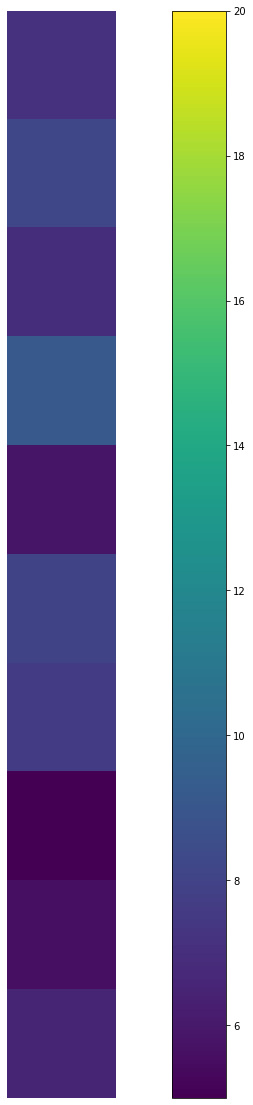

In [409]:
# Make a histogram plot
plt.figure(figsize=(20,20))
plt.imshow(entropies, vmin=5, vmax=20)
plt.axis('off')
plt.colorbar()

In [395]:
res = np.array(res)
res = res.flatten()
res

array(['dreamfiles/dream_ten/dream0_0.csv',
       'dreamfiles/dream_ten/dream1_0.csv',
       'dreamfiles/dream_ten/dream2_0.csv',
       'dreamfiles/dream_ten/dream3_0.csv',
       'dreamfiles/dream_ten/dream4_0.csv',
       'dreamfiles/dream_ten/dream5_0.csv',
       'dreamfiles/dream_ten/dream6_0.csv',
       'dreamfiles/dream_ten/dream7_0.csv',
       'dreamfiles/dream_ten/dream8_0.csv',
       'dreamfiles/dream_ten/dream9_0.csv'], dtype='<U33')

# Make individual plots on the inverse dreamed graphs 

[0.6504940112296481, 0.20020315069205535, -0.29233131268291873, -0.32226540699030315, -0.07397193579810867, 0.09880953051107069, 0.3832116868544065, -0.9816684278331862, 0.6313190627913497, 0.5564707724095707, -0.0227180244402734, 0.783861549258246, 0.7603022344029539, -0.5025684080502197, 0.1733934783762527, 1.0, 0.5175066921647122, -0.003945921900976871, 0.18775202507343555, -0.5646597946324362, -0.052226146648073894, 0.403683331001195, -0.6456831047569724, 0.5909504991580177]
State:
{((0, 0), (1, 0), (2, 0), (3, 0)): -0.06888948420770799,
 ((0, 0), (1, 0), (2, 0), (3, 1)): -0.034401393016711655,
 ((0, 0), (1, 0), (2, 1), (3, 0)): -0.022891147985062896,
 ((0, 0), (1, 0), (2, 1), (3, 1)): 0.290280661074874,
 ((0, 0), (1, 1), (2, 0), (3, 0)): 0.06055050097274067,
 ((0, 0), (1, 1), (2, 0), (3, 1)): -0.11076892791207517,
 ((0, 0), (1, 1), (2, 1), (3, 0)): 0.013800840295161976,
 ((0, 0), (1, 1), (2, 1), (3, 1)): -0.26430437627318315,
 ((0, 1), (1, 0), (2, 0), (3, 0)): 0.04361483115965266,

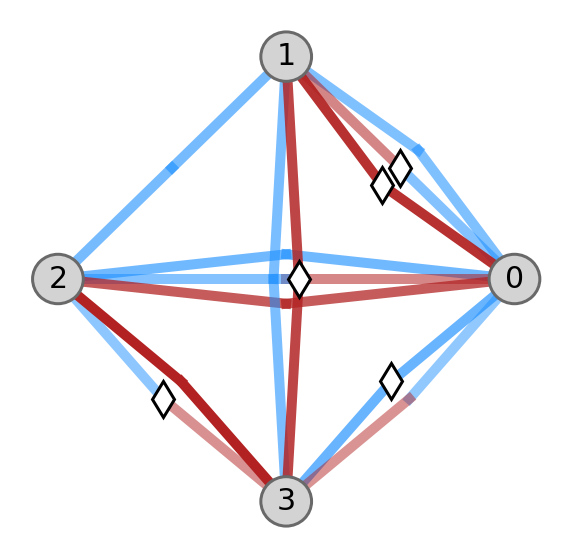

In [408]:
# Plots individual graphs 

def graphPlotter(finalWeights, edges, firstIndex, lastIndex, threshold, fancyPlot=False):
    selectWeights = finalWeights[firstIndex:lastIndex]
    avgWeight = [sum(sub_list) / len(sub_list) for sub_list in zip(*selectWeights)]
    graph = fc.Graph(edges=edges, weights=avgWeight)
    graph.getState()
    dreamstate = graph.state
    dreamstate.normalize()
    print("State:")
    print(graph.state)
    print(f"Fidelity: {(state @ graph.state) ** 2}")
    graph.purge(threshold=threshold, update=True)
    newgraph = fc.Graph(graph.edges, weights=graph.weights)
    if(fancyPlot):
        gp.leiwandPlot(newgraph)
    else:
        gp.graphPlot(newgraph)

        
finalWeights = loadAll(res)
#activations = loadAll(combFile)[0]
print(finalWeights[1])

#maxActive = np.argmax(activations)
graphPlotter(finalWeights, edges,8,9,0.3)   

In [185]:
finalWeights[0]

[0.14498596075757503,
 0.052634283429702,
 0.019207945483042936,
 -0.21758610011054688,
 -0.4027447680987188,
 0.04994124813133548,
 -0.027412096674493153,
 0.08839557948532288,
 0.6790670759750147,
 -0.02373875200523088,
 0.04423018624001642,
 -0.0757639450005822,
 -0.5302692966876964,
 0.004882140056703235,
 -0.010116564809084107,
 -0.14101519723664893,
 -1.0,
 -0.08086768401044628,
 0.021088417882098007,
 0.12865255562093295,
 -0.3164736731583419,
 0.050013484545277716,
 0.017847943979707234,
 -0.24850393493558656]

In [51]:
res

[['dreamfiles/dream_400_one_layer2_888/dream0_0.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_2.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_3.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_4.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_5.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_6.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_7.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_8.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_9.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_10.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_11.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_12.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_13.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_14.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_15.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_16.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_17.csv'],
 ['dreamfiles/dream_400_one_layer2_888/dream0_18.csv'],
 

# Let's make a crazy visualization out of the neural networks (based on this paper)


https://kindxiaoming.github.io/pdfs/BIMT.pdf


![image.png](attachment:image.png)

In [270]:
# Let's create a class for a neuron that holds (a) their designated layer and (b) the weights corresponding to previous neurons

class neuron:
    # x, y - double - coordinates of the neuron along a plane
    # WEIGHTS - array - weights of incoming edges of the neuron 
    # LAYER - int - which layer does the neuron lay in the network?
    # rad - double - how big ought the neurons to appear? 
    def __init__(self, x, y, WEIGHTS, LAYER, RAD):
        self.weights=WEIGHTS
        self.layer=LAYER
        self.x = x
        self.y = y
        self.rad = RAD
    
    def draw(self):
        point = plt.scatter(self.x, self.y,self.layer)
        
    def getWeight(self):
        return self.weights
    
    def getLayer(self):
        return self.layer
    
    def setWeights(self, WEIGHTS):
        self.weights = WEIGHTS
    
    def setLayers(self, LAYER):
        self.layer = LAYER

# Define layer+neuron indices for each layer

hiddenLayers = np.arange(1,4)
neuronsHidden = np.arange(400)
neuronsBN = np.arange(2)
neuRad = 0.05

totalNeurons = [neuronsHidden, neuronsHidden, neuronsBN]

# Now let's create a list of these neurons 

neurons = []

for layer in hiddenLayers:
    neuList = totalNeurons[layer-1]
    for ii, neu in enumerate(neuList):
        x,y = coords[ii]
        weights = model.mynn[layer*2].weight[neu]
        weights = weights.detach().numpy()
        neurons.append(neuron(x, y, weights, layer, neuRad))
        
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

NameError: name 'model' is not defined

In [369]:
meanPMs[0]

[array([0.00302541, 0.05348431, 0.48840927]),
 array([0.10650943, 0.00196674, 0.00216821]),
 array([0.02765483, 0.00027034, 0.00022219]),
 array([1.51302420e-01, 9.94109155e-06, 9.86390637e-07]),
 array([1.07554768e-05, 4.67748433e-02, 3.55294745e-02]),
 array([3.78646395e-04, 1.69341841e-01, 1.57727043e-04]),
 array([9.83143024e-05, 2.36428384e-04, 4.93916977e-02]),
 array([0.00053789, 0.00085596, 0.00021927]),
 array([0.00066106, 0.0068333 , 0.15382737]),
 array([0.0232726 , 0.00025128, 0.22406738]),
 array([6.04265447e-03, 8.27343309e-02, 6.99811830e-05]),
 array([0.03305999, 0.00304233, 0.00010194]),
 array([0.00985762, 0.00597608, 0.01119022]),
 array([0.34703722, 0.02163558, 0.01629985]),
 array([0.09010708, 0.07235552, 0.01555621]),
 array([0.49298516, 0.26195314, 0.02265941])]

In [343]:
res[9]

['dreamfiles/dream_looong_layer18_888/dream0_441.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_442.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_443.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_444.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_445.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_446.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_447.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_448.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_449.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_450.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_451.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_452.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_453.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_454.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_455.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_456.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_457.csv',
 'dreamfiles/dream_looong_layer18_888/dream0_458.csv',
 'dreamfil